In [ ]:
import pandas as pd
import sys
import pyprojroot
import numpy as np
import pyreadr
import seaborn as sns
import importlib
sys.path.append(str(pyprojroot.here()))
import src.pandas_missing_extension
importlib.reload(src.pandas_missing_extension)
from src.utils import make_dir_function
from src.pandas_missing_extension import MissingMethods

In [40]:
data_dir = make_dir_function("data")
riskfactor_file = data_dir("raw", "riskfactors.rda")

In [41]:
riskfactors_df = pyreadr.read_r(riskfactor_file)['riskfactors']

### Build the shadow matrix

In [42]:
# 1. Define a boolean matrix
# 2. Replace True with 'Missing' and False with 'Not missing'
# 3. Add suffix to column names
# 4. Concatenate the original dataframe
riskfactors_df.isna().replace(
    {
        True: 'Missing',
        False: 'Not missing'
    }
).add_suffix('_NA').pipe(
    lambda shadow_matrix: pd.concat(
        [riskfactors_df, shadow_matrix],
        axis='columns'
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


In [43]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


### Exploring statistics using the shadow matrix

In [44]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).groupby(
    ['weight_lbs_NA']
)['age'].describe().reset_index()

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


### Visualization of missing values in a variable, considering a second one

(<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>,)

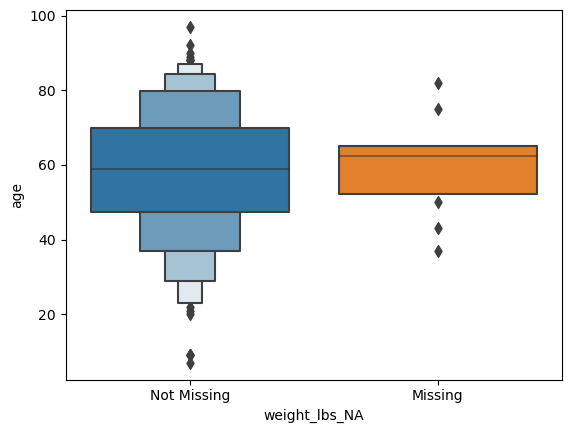

In [45]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(
    lambda df: (
        sns.boxenplot(
            data=df,
            x='weight_lbs_NA',
            y='age',
        ),
    )
)

(<seaborn.axisgrid.FacetGrid at 0x7f4021ede8f0>,)

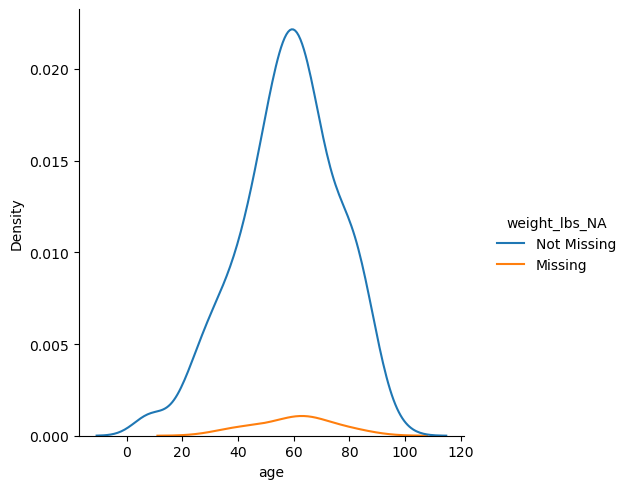

In [46]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(
    lambda df: (
        sns.displot(
            data=df,
            x='age',
            hue='weight_lbs_NA',
            kind='kde',
        ),
    )
)

(<seaborn.axisgrid.FacetGrid at 0x7f4021a2ada0>,)

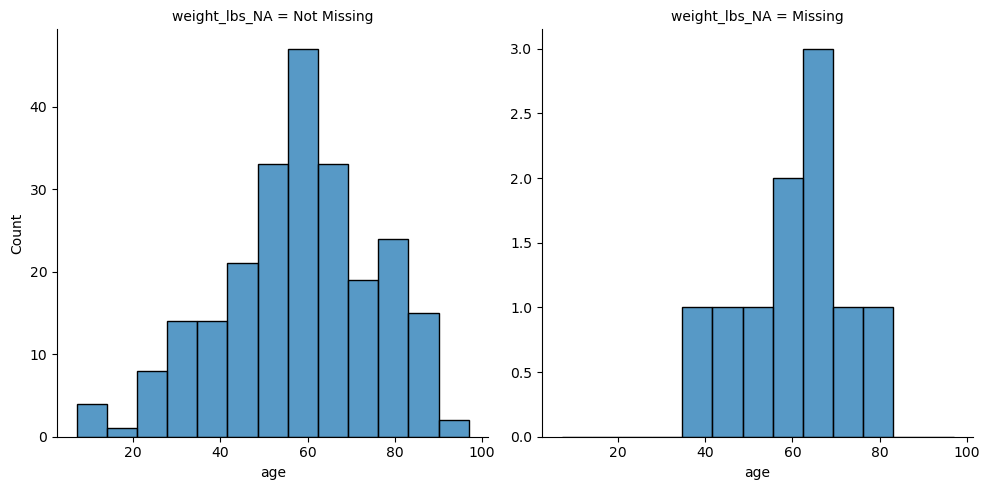

In [47]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(
    lambda df: (
        sns.displot(
            data=df,
            x='age',
            col='weight_lbs_NA',
            facet_kws={'sharey': False},
        ),
    )
)

(<seaborn.axisgrid.FacetGrid at 0x7f4020d4aef0>,)

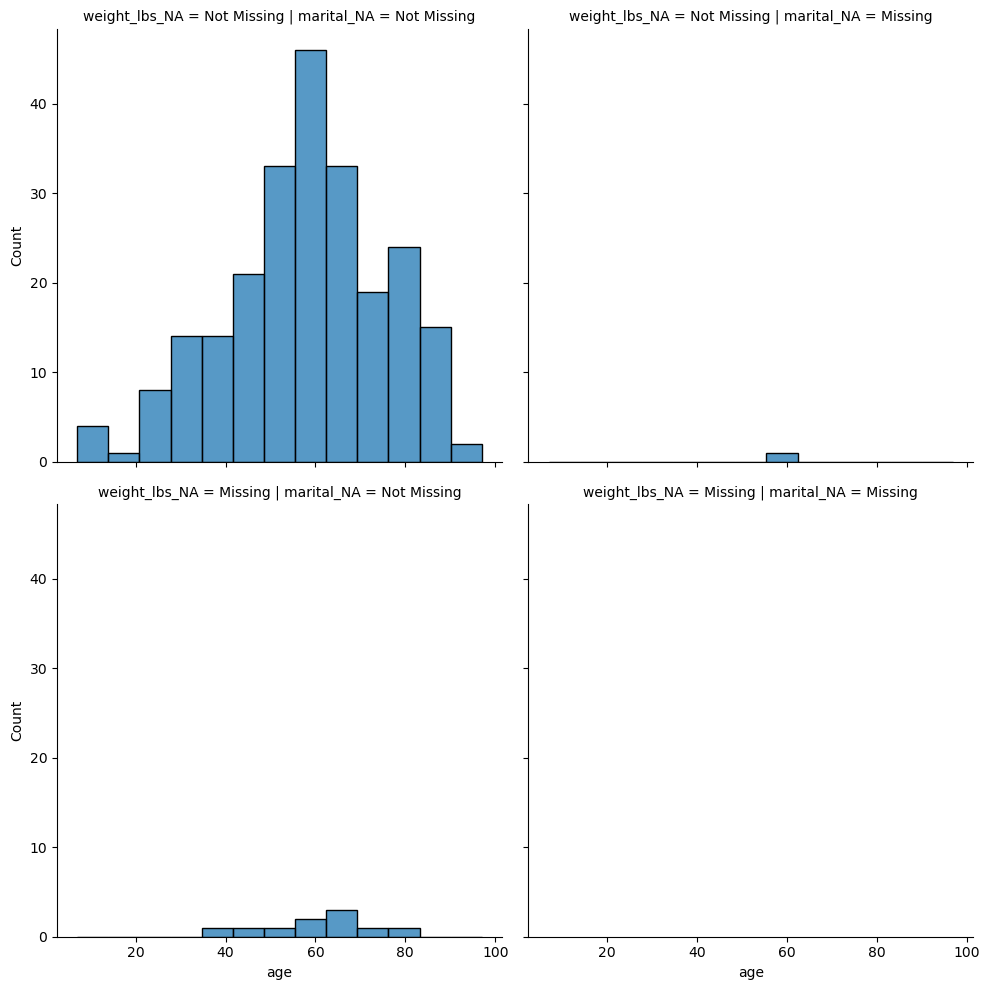

In [48]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(
    lambda df: (
        sns.displot(
            data=df,
            x='age',
            col='marital_NA',
            row='weight_lbs_NA',
        ),
    )
)

### Visualization of missing values in two variables

In [49]:
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float = 0.1,
    jitter: float = 0.075,
    seed: int = 42
) -> pd.Series:
    # Creates a copy to prevent overwriting the original
    column = column.copy(deep=True)
    
    # Extract values metadata
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min() * proportion_below

    # Create the jitter (noise) to add around the points
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data
    column[missing_mask] = column_shift + column_jitter

    return column

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

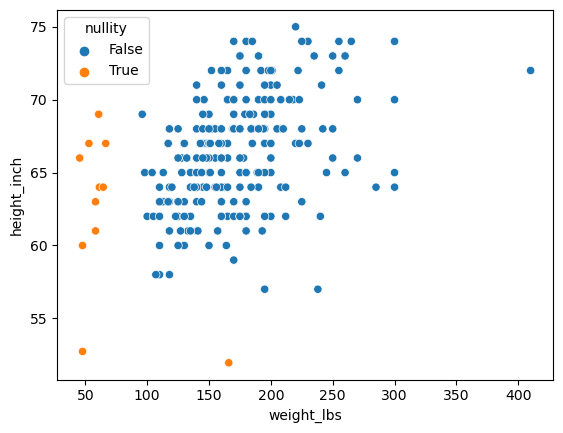

In [50]:
riskfactors_df.select_dtypes(
    exclude='category'                          # Remains only numeric columns
).pipe(
    lambda df: df[df.columns[df.isna().any()]]  # Select columns with missing values
).missing.bind_shadow_matrix(
    true_string= True, false_string= False      # Add shadow matrix
).apply(
    lambda column: column if "_NA" in column.name else column_fill_with_dummies(    # Fill missing values
        column,
        proportion_below=0.05,
        jitter=0.075,
    )
).assign(
    nullity= lambda df: df.weight_lbs_NA | df.height_inch_NA    # Create a new column (the last one)
).pipe(
    lambda df: (
        sns.scatterplot(
            data=df,
            x='weight_lbs',
            y='height_inch',
            hue='nullity',
        )
    )
)

On the left side, we can see orange dots representing measurements from the height_inch column that do not have corresponding values in the weight_lbs column. Meanwhile, at the bottom, there is a dot representing a measurement from the weight_lbs column that does not have a corresponding value in height_inch.

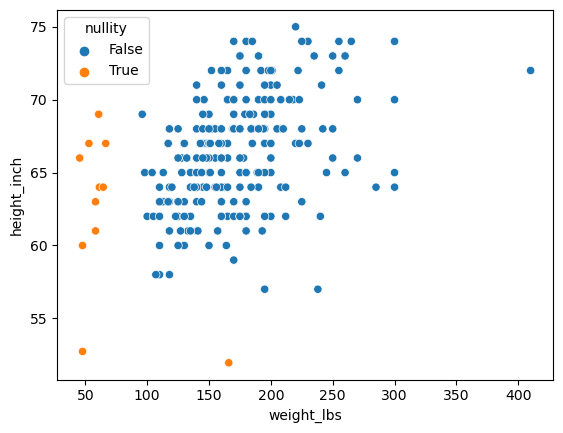

In [51]:
riskfactors_df.missing.missing_values_plot('weight_lbs', 'height_inch')